# 1. Pretraining Data

In [1]:
import blosc
from collections import defaultdict
import io
import os
import pickle as pkl
from PIL import Image
from tqdm import tqdm

In [5]:
!ls ../../data/babyai_pretraining/BossLevel

split_train_0.pkl  split_train_6.pkl  split_valid_2.pkl  split_valid_8.pkl
split_train_1.pkl  split_train_7.pkl  split_valid_3.pkl  split_valid_9.pkl
split_train_2.pkl  split_train_8.pkl  split_valid_4.pkl  temp.sh
split_train_3.pkl  split_train_9.pkl  split_valid_5.pkl
split_train_4.pkl  split_valid_0.pkl  split_valid_6.pkl
split_train_5.pkl  split_valid_1.pkl  split_valid_7.pkl


In [2]:
data_dir_path = "../../data/babyai_pretraining/BossLevel"

train_demos = [] 
for split_id in tqdm(range(10)):
    with open(os.path.join(data_dir_path, f"split_train_{split_id}.pkl"), "rb") as f:
        train_demos += pkl.load(f)

valid_demos = [] 
for split_id in tqdm(range(10)):
    with open(os.path.join(data_dir_path, f"split_valid_{split_id}.pkl"), "rb") as f:
        valid_demos += pkl.load(f)

print(f"Train: {len(train_demos)}")
print(f"Valid: {len(valid_demos)}")

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 18.50it/s]

Train: 100000
Valid: 5000


In [50]:
!ls ../../data/babyai_pretraining

BabyAI-BossLevel-Small-v0.pkl	       BabyAI-BossLevel-v0-split-8_valid.pkl
BabyAI-BossLevel-Small-v0_valid.pkl    BabyAI-BossLevel-v0-split-9.pkl
BabyAI-BossLevel-v0.pkl		       BabyAI-BossLevel-v0-split-9_valid.pkl
BabyAI-BossLevel-v0-split-0.pkl        BabyAI-GoToLocal-v0.pkl
BabyAI-BossLevel-v0-split-0_valid.pkl  BabyAI-GoToLocal-v0_valid.pkl
BabyAI-BossLevel-v0-split-1.pkl        BabyAI-GoToObjMaze-v0.pkl
BabyAI-BossLevel-v0-split-1_valid.pkl  BabyAI-GoToObj-v0.pkl
BabyAI-BossLevel-v0-split-2.pkl        BabyAI-GoToObj-v0_valid.pkl
BabyAI-BossLevel-v0-split-2_valid.pkl  BabyAI-GoToRedBallGrey-v0.pkl
BabyAI-BossLevel-v0-split-3.pkl        BabyAI-GoToRedBallGrey-v0_valid.pkl
BabyAI-BossLevel-v0-split-3_valid.pkl  BabyAI-GoToRedBall-v0.pkl
BabyAI-BossLevel-v0-split-4.pkl        BabyAI-GoToRedBall-v0_valid.pkl
BabyAI-BossLevel-v0-split-4_valid.pkl  BabyAI-GoTo-v0.pkl
BabyAI-BossLevel-v0-split-5.pkl        BabyAI-PickupLoc-v0.pkl
BabyAI-BossLevel-v0-split-5_valid.pkl  BabyAI-PickupLoc-v0

In [20]:
with open(os.path.join("../../data/babyai_pretraining/BossLevel", f"BabyAI-BossLevel-v0-split-0.pkl"), "rb") as f:
    data1 = pkl.load(f)
    
with open(os.path.join("../../data/babyai_pretraining/BossLevel", f"BabyAI-BossLevel-v0-split-1.pkl"), "rb") as f:
    data2 = pkl.load(f)


In [21]:
overlap_valid = 0
for demo_id, demo in tqdm(enumerate(data1), total=len(data1)):
    mission = demo[0]
    img = demo[2]
    action_seq = demo[-1]
    for demo_id_t, demo_t in enumerate(data2):
        mission_t = demo_t[0]
        img_t = demo_t[2]
        action_seq_t = demo_t[-1]
        if (img == img_t) and (mission == mission_t) and (action_seq == action_seq_t):
            overlap_valid += 1
overlap_valid

100%|████████████████████████████████████████| 10/10 [00:00<00:00, 53567.10it/s]


0

In [83]:
valid_demos = [] 
for split_id in tqdm(range(10)):
    with open(os.path.join("../../data/babyai_pretraining", f"BabyAI-BossLevel-v0-split-{split_id}_valid.pkl"), "rb") as f:
        valid_demos += pkl.load(f)

100%|███████████████████████████████████████████| 10/10 [00:24<00:00,  2.42s/it]


In [3]:
data_dir_path = "../../data/babyai_pretraining/BossLevel"

with open(os.path.join(data_dir_path, f"split_train_0.pkl"), "rb") as f:
    data1 = pkl.load(f)

with open(os.path.join(data_dir_path, f"split_train_1.pkl"), "rb") as f:
    data2 = pkl.load(f)

In [8]:
data1[2]["mission"]

'open a door and put a ball next to the purple key in front of you'

In [9]:
data2[1]["mission"]

'open a door and put a ball next to the purple key in front of you'

In [6]:
img, mission, action_seq = data1[2].values()
img_t, mission_t, action_seq_t = data2[1].values()
(img == img_t) and (mission == mission_t) and (action_seq == action_seq_t)

True

In [85]:
overlap_valid = 0
for demo_id, valid_demo in tqdm(enumerate(valid_demos), total=len(valid_demos)):
    mission = valid_demo[0]
    img = valid_demo[2]
    action_seq = valid_demo[-1]
    for demo_id_t, train_demo in enumerate(valid_demos):
        mission_t = train_demo[0]
        img_t = train_demo[2]
        action_seq_t = train_demo[-1]
        if (img == img_t) and (mission == mission_t) and (action_seq == action_seq_t):
            overlap_valid += 1
            

  5%|█▊                                  | 5000/100000 [00:16<05:19, 296.90it/s]


In [7]:
img, mission, action_seq = train_demos[1].values()
img_t, mission_t, action_seq_t = train_demos[10000].values()
(img == img_t) and (mission == mission_t) and (action_seq == action_seq_t)

True

In [4]:
overlap = 0
for demo_id, demo in tqdm(enumerate(train_demos), total=len(train_demos)):
    img, mission, action_seq = demo.values()
    for demo_id_t, demo_t in enumerate(train_demos):
        img_t, mission_t, action_seq_t = demo_t.values()
        if (img == img_t) and (mission == mission_t) and (action_seq == action_seq_t):
            overlap += 1
            print(demo_id_t)
    #print()

  0%|                                      | 2/100000 [00:00<2:11:17, 12.69it/s]

0
1
10000
2
10001
20000


  0%|                                      | 4/100000 [00:00<2:09:16, 12.89it/s]

3
10002
20001
30000
4
10003
20002
30001
40000
5
10004
20003
30002


  0%|                                      | 6/100000 [00:00<2:24:29, 11.53it/s]

40001
50000
6
10005
20004
30003
40002
50001
60000
7
10006
20005
30004
40003
50002
60001
70000


  0%|                                     | 10/100000 [00:00<2:13:40, 12.47it/s]

8
10007
20006
30005
40004
50003
60002
70001
80000
9
10008
20007
30006
40005
50004
60003
70002
80001
90000
10
10009
20008
30007
40006
50005
60004
70003


  0%|                                     | 12/100000 [00:00<2:13:39, 12.47it/s]

80002
90001
11
10010
20009
30008
40007
50006
60005
70004
80003
90002
12
10011
20010
30009
40008
50007
60006
70005
80004
90003
13
10012
20011


  0%|                                     | 14/100000 [00:01<2:14:29, 12.39it/s]

30010
40009
50008
60007
70006
80005
90004
14
10013
20012
30011
40010
50009
60008
70007
80006
90005
15
10014
20013
30012
40011
50010
60009
70008
80007
90006


  0%|                                     | 18/100000 [00:01<2:09:00, 12.92it/s]

16
10015
20014
30013
40012
50011
60010
70009
80008
90007
17
10016
20015
30014
40013
50012
60011
70010
80009
90008
18
10017
20016
30015
40014
50013
60012
70011
80010
90009
19


  0%|                                     | 22/100000 [00:01<1:57:49, 14.14it/s]

10018
20017
30016
40015
50014
60013
70012
80011
90010
20
10019
20018
30017
40016
50015
60014
70013
80012
90011
21
10020
20019
30018
40017
50016
60015
70014
80013
90012
22
10021
20020
30019


  0%|                                     | 24/100000 [00:01<1:56:37, 14.29it/s]

40018
50017
60016
70015
80014
90013
23
10022
20021
30020
40019
50018
60017
70016
80015
90014
24
10023
20022
30021
40020
50019
60018
70017
80016
90015
25
10024
20023
30022
40021
50020
60019


  0%|                                     | 28/100000 [00:02<1:57:29, 14.18it/s]

70018
80017
90016
26
10025
20024
30023
40022
50021
60020
70019
80018
90017
27
10026
20025
30024
40023
50022
60021
70020
80019
90018
28
10027
20026
30025
40024
50023
60022
70021


  0%|                                     | 30/100000 [00:02<1:57:17, 14.21it/s]

80020
90019
29
10028
20027
30026
40025
50024
60023
70022
80021
90020
30
10029
20028
30027
40026
50025
60024
70023
80022
90021
31
10030
20029
30028
40027
50026
60025
70024
80023
90022


  0%|                                     | 34/100000 [00:02<1:57:12, 14.21it/s]

32
10031
20030
30029
40028
50027
60026
70025
80024
90023
33
10032
20031
30030
40029
50028
60027
70026
80025
90024
34
10033
20032
30031
40030
50029
60028
70027
80026
90025
35


  0%|                                     | 38/100000 [00:02<1:52:44, 14.78it/s]

10034
20033
30032
40031
50030
60029
70028
80027
90026
36
10035
20034
30033
40032
50031
60030
70029
80028
90027
37
10036
20035
30034
40033
50032
60031
70030
80029
90028
38
10037
20036


  0%|                                     | 40/100000 [00:02<1:50:56, 15.02it/s]

30035
40034
50033
60032
70031
80030
90029
39
10038
20037
30036
40035
50034
60033
70032
80031
90030
40
10039
20038
30037
40036
50035
60034
70033
80032
90031
41
10040
20039
30038
40037
50036
60035
70034


  0%|                                     | 44/100000 [00:03<1:50:39, 15.05it/s]

80033
90032
42
10041
20040
30039
40038
50037
60036
70035
80034
90033
43
10042
20041
30040
40039
50038
60037
70036
80035
90034
44
10043
20042
30041
40040
50039
60038
70037
80036
90035
45


  0%|                                     | 48/100000 [00:03<1:50:51, 15.03it/s]

10044
20043
30042
40041
50040
60039
70038
80037
90036
46
10045
20044
30043
40042
50041
60040
70039
80038
90037
47
10046
20045
30044
40043
50042
60041
70040
80039
90038
48
10047
20046
30045


  0%|                                     | 50/100000 [00:03<1:50:52, 15.02it/s]

40044
50043
60042
70041
80040
90039
49
10048
20047
30046
40045
50044
60043
70042
80041
90040
50
10049
20048
30047
40046
50045
60044
70043
80042
90041
51
10050
20049
30048
40047


  0%|                                     | 54/100000 [00:03<1:52:44, 14.78it/s]

50046
60045
70044
80043
90042
52
10051
20050
30049
40048
50047
60046
70045
80044
90043
53
10052
20051
30050
40049
50048
60047
70046
80045
90044
54
10053
20052
30051
40050
50049
60048
70047


  0%|                                     | 58/100000 [00:04<1:52:16, 14.84it/s]

80046
90045
55
10054
20053
30052
40051
50050
60049
70048
80047
90046
56
10055
20054
30053
40052
50051
60050
70049
80048
90047
57
10056
20055
30054
40053
50052
60051
70050
80049
90048
58


  0%|                                     | 60/100000 [00:04<1:52:36, 14.79it/s]

10057
20056
30055
40054
50053
60052
70051
80050
90049
59
10058
20057
30056
40055
50054
60053
70052
80051
90050
60
10059
20058
30057
40056
50055
60054
70053
80052
90051
61
10060


  0%|                                     | 64/100000 [00:04<1:50:10, 15.12it/s]

20059
30058
40057
50056
60055
70054
80053
90052
62
10061
20060
30059
40058
50057
60056
70055
80054
90053
63
10062
20061
30060
40059
50058
60057
70056
80055
90054
64
10063
20062
30061
40060
50059


  0%|                                     | 66/100000 [00:04<1:50:08, 15.12it/s]

60058
70057
80056
90055
65
10064
20063
30062
40061
50060
60059
70058
80057
90056
66
10065
20064
30063
40062
50061
60060
70059
80058
90057
67
10066
20065
30064
40063
50062
60061
70060


  0%|                                     | 70/100000 [00:04<1:50:19, 15.10it/s]

80059
90058
68
10067
20066
30065
40064
50063
60062
70061
80060
90059
69
10068
20067
30066
40065
50064
60063
70062
80061
90060
70
10069
20068
30067
40066
50065
60064
70063
80062
90061
71
10070


  0%|                                     | 74/100000 [00:05<1:50:28, 15.07it/s]

20069
30068
40067
50066
60065
70064
80063
90062
72
10071
20070
30069
40068
50067
60066
70065
80064
90063
73
10072
20071
30070
40069
50068
60067
70066
80065
90064
74
10073
20072


  0%|                                     | 76/100000 [00:05<1:54:41, 14.52it/s]

30071
40070
50069
60068
70067
80066
90065
75
10074
20073
30072
40071
50070
60069
70068
80067
90066
76
10075
20074
30073
40072
50071
60070
70069
80068
90067
77
10076
20075
30074


  0%|                                     | 80/100000 [00:05<1:55:11, 14.46it/s]

40073
50072
60071
70070
80069
90068
78
10077
20076
30075
40074
50073
60072
70071
80070
90069
79
10078
20077
30076
40075
50074
60073
70072
80071
90070
80
10079
20078
30077
40076


  0%|                                     | 82/100000 [00:05<1:54:11, 14.58it/s]

50075
60074
70073
80072
90071
81
10080
20079
30078
40077
50076
60075
70074
80073
90072
82
10081
20080
30079
40078
50077
60076
70075
80074
90073
83
10082
20081
30080
40079
50078
60077


  0%|                                     | 86/100000 [00:06<1:56:45, 14.26it/s]

70076
80075
90074
84
10083
20082
30081
40080
50079
60078
70077
80076
90075
85
10084
20083
30082
40081
50080
60079
70078
80077
90076
86
10085
20084
30083
40082
50081


  0%|                                     | 88/100000 [00:06<1:54:42, 14.52it/s]

60080
70079
80078
90077
87
10086
20085
30084
40083
50082
60081
70080
80079
90078
88
10087
20086
30085
40084
50083
60082
70081
80080
90079
89
10088
20087
30086
40085
50084
60083
70082


  0%|                                     | 92/100000 [00:06<1:54:19, 14.57it/s]

80081
90080
90
10089
20088
30087
40086
50085
60084
70083
80082
90081
91
10090
20089
30088
40087
50086
60085
70084
80083
90082
92
10091
20090
30089
40088
50087
60086
70085
80084
90083


  0%|                                     | 96/100000 [00:06<1:52:08, 14.85it/s]

93
10092
20091
30090
40089
50088
60087
70086
80085
90084
94
10093
20092
30091
40090
50089
60088
70087
80086
90085
95
10094
20093
30092
40091
50090
60089
70088
80087
90086
96
10095
20094
30093


  0%|                                     | 98/100000 [00:06<1:52:46, 14.76it/s]

40092
50091
60090
70089
80088
90087
97
10096
20095
30094
40093
50092
60091
70090
80089
90088
98
10097
20096
30095
40094
50093
60092
70091
80090
90089
99
10098
20097
30096
40095
50094


  0%|                                    | 102/100000 [00:07<1:52:39, 14.78it/s]

60093
70092
80091
90090
100
10099
20098
30097
40096
50095
60094
70093
80092
90091
101
10100
20099
30098
40097
50096
60095
70094
80093
90092
102
10101
20100
30099
40098
50097
60096
70095


  0%|                                    | 106/100000 [00:07<1:50:06, 15.12it/s]

80094
90093
103
10102
20101
30100
40099
50098
60097
70096
80095
90094
104
10103
20102
30101
40100
50099
60098
70097
80096
90095
105
10104
20103
30102
40101
50100
60099
70098
80097
90096
106


  0%|                                    | 108/100000 [00:07<1:50:07, 15.12it/s]

10105
20104
30103
40102
50101
60100
70099
80098
90097
107
10106
20105
30104
40103
50102
60101
70100
80099
90098
108
10107
20106
30105
40104
50103
60102
70101
80100
90099
109
10108
20107
30106
40105


  0%|                                    | 112/100000 [00:07<1:51:01, 14.99it/s]

50104
60103
70102
80101
90100
110
10109
20108
30107
40106
50105
60104
70103
80102
90101
111
10110
20109
30108
40107
50106
60105
70104
80103
90102
112
10111
20110
30109
40108
50107
60106
70105


  0%|                                    | 114/100000 [00:07<1:50:23, 15.08it/s]

80104
90103
113
10112
20111
30110
40109
50108
60107
70106
80105
90104
114
10113
20112
30111
40110
50109
60108
70107
80106
90105
115
10114
20113
30112
40111
50110
60109
70108
80107
90106


  0%|                                    | 118/100000 [00:08<1:51:12, 14.97it/s]

116
10115
20114
30113
40112
50111
60110
70109
80108
90107
117
10116
20115
30114
40113
50112
60111
70110
80109
90108
118
10117
20116
30115
40114
50113
60112
70111
80110
90109
119
10118


  0%|                                    | 122/100000 [00:08<1:50:20, 15.09it/s]

20117
30116
40115
50114
60113
70112
80111
90110
120
10119
20118
30117
40116
50115
60114
70113
80112
90111
121
10120
20119
30118
40117
50116
60115
70114
80113
90112
122
10121
20120
30119
40118
50117
60116
70115
80114
90113
123


  0%|                                    | 126/100000 [00:08<1:49:32, 15.20it/s]

10122
20121
30120
40119
50118
60117
70116
80115
90114
124
10123
20122
30121
40120
50119
60118
70117
80116
90115
125
10124
20123
30122
40121
50120
60119
70118
80117
90116
126
10125
20124
30123
40122


  0%|                                    | 128/100000 [00:08<1:49:10, 15.25it/s]

50121
60120
70119
80118
90117
127
10126
20125
30124
40123
50122
60121
70120
80119
90118
128
10127
20126
30125
40124
50123
60122
70121
80120
90119
129
10128
20127
30126
40125
50124
60123
70122
80121
90120


  0%|                                    | 132/100000 [00:09<1:50:02, 15.13it/s]

130
10129
20128
30127
40126
50125
60124
70123
80122
90121
131
10130
20129
30128
40127
50126
60125
70124
80123
90122
132
10131
20130
30129
40128
50127
60126
70125
80124
90123
133


  0%|                                    | 136/100000 [00:09<1:49:36, 15.19it/s]

10132
20131
30130
40129
50128
60127
70126
80125
90124
134
10133
20132
30131
40130
50129
60128
70127
80126
90125
135
10134
20133
30132
40131
50130
60129
70128
80127
90126
136
10135
20134
30133
40132


  0%|                                    | 138/100000 [00:09<1:49:55, 15.14it/s]

50131
60130
70129
80128
90127
137
10136
20135
30134
40133
50132
60131
70130
80129
90128
138
10137
20136
30135
40134
50133
60132
70131
80130
90129
139
10138
20137
30136
40135
50134
60133
70132


  0%|                                    | 142/100000 [00:09<1:50:38, 15.04it/s]

80131
90130
140
10139
20138
30137
40136
50135
60134
70133
80132
90131
141
10140
20139
30138
40137
50136
60135
70134
80133
90132
142
10141
20140
30139
40138
50137
60136
70135
80134
90133
143


  0%|                                    | 146/100000 [00:10<1:48:03, 15.40it/s]

10142
20141
30140
40139
50138
60137
70136
80135
90134
144
10143
20142
30141
40140
50139
60138
70137
80136
90135
145
10144
20143
30142
40141
50140
60139
70138
80137
90136
146
10145
20144
30143
40142


  0%|                                    | 148/100000 [00:10<1:50:23, 15.08it/s]

50141
60140
70139
80138
90137
147
10146
20145
30144
40143
50142
60141
70140
80139
90138
148
10147
20146
30145
40144
50143
60142
70141
80140
90139
149
10148
20147
30146
40145
50144
60143
70142
80141
90140


  0%|                                    | 152/100000 [00:10<1:50:29, 15.06it/s]

150
10149
20148
30147
40146
50145
60144
70143
80142
90141
151
10150
20149
30148
40147
50146
60145
70144
80143
90142
152
10151
20150
30149
40148
50147
60146
70145
80144
90143
153
10152
20151
30150


  0%|                                    | 156/100000 [00:10<1:51:44, 14.89it/s]

40149
50148
60147
70146
80145
90144
154
10153
20152
30151
40150
50149
60148
70147
80146
90145
155
10154
20153
30152
40151
50150
60149
70148
80147
90146
156
10155
20154
30153
40152
50151
60150
70149


  0%|                                    | 158/100000 [00:10<1:50:45, 15.02it/s]

80148
90147
157
10156
20155
30154
40153
50152
60151
70150
80149
90148
158
10157
20156
30155
40154
50153
60152
70151
80150
90149
159
10158
20157
30156
40155
50154
60153
70152
80151
90150


  0%|                                    | 162/100000 [00:11<1:50:40, 15.03it/s]

160
10159
20158
30157
40156
50155
60154
70153
80152
90151
161
10160
20159
30158
40157
50156
60155
70154
80153
90152
162
10161
20160
30159
40158
50157
60156
70155
80154
90153
163
10162


  0%|                                    | 164/100000 [00:11<2:00:34, 13.80it/s]

20161
30160
40159
50158
60157
70156
80155
90154
164
10163
20162
30161
40160
50159
60158
70157
80156
90155
165
10164
20163
30162
40161
50160
60159
70158
80157
90156


  0%|                                    | 168/100000 [00:11<1:55:57, 14.35it/s]

166
10165
20164
30163
40162
50161
60160
70159
80158
90157
167
10166
20165
30164
40163
50162
60161
70160
80159
90158
168
10167
20166
30165
40164
50163
60162
70161
80160
90159
169
10168


  0%|                                    | 172/100000 [00:11<1:52:58, 14.73it/s]

20167
30166
40165
50164
60163
70162
80161
90160
170
10169
20168
30167
40166
50165
60164
70163
80162
90161
171
10170
20169
30168
40167
50166
60165
70164
80163
90162
172
10171
20170
30169
40168
50167


  0%|                                    | 174/100000 [00:11<1:52:58, 14.73it/s]

60166
70165
80164
90163
173
10172
20171
30170
40169
50168
60167
70166
80165
90164
174
10173
20172
30171
40170
50169
60168
70167
80166
90165
175
10174
20173
30172
40171
50170
60169
70168
80167


  0%|                                    | 178/100000 [00:12<1:50:29, 15.06it/s]

90166
176
10175
20174
30173
40172
50171
60170
70169
80168
90167
177
10176
20175
30174
40173
50172
60171
70170
80169
90168
178
10177
20176
30175
40174
50173
60172
70171
80170
90169
179


  0%|                                    | 182/100000 [00:12<1:50:33, 15.05it/s]

10178
20177
30176
40175
50174
60173
70172
80171
90170
180
10179
20178
30177
40176
50175
60174
70173
80172
90171
181
10180
20179
30178
40177
50176
60175
70174
80173
90172
182
10181


  0%|                                    | 184/100000 [00:12<1:50:33, 15.05it/s]

20180
30179
40178
50177
60176
70175
80174
90173
183
10182
20181
30180
40179
50178
60177
70176
80175
90174
184
10183
20182
30181
40180
50179
60178
70177
80176
90175
185
10184
20183
30182


  0%|                                    | 188/100000 [00:12<1:51:34, 14.91it/s]

40181
50180
60179
70178
80177
90176
186
10185
20184
30183
40182
50181
60180
70179
80178
90177
187
10186
20185
30184
40183
50182
60181
70180
80179
90178
188
10187
20186
30185
40184
50183
60182
70181
80180
90179


  0%|                                    | 192/100000 [00:13<1:54:01, 14.59it/s]

189
10188
20187
30186
40185
50184
60183
70182
80181
90180
190
10189
20188
30187
40186
50185
60184
70183
80182
90181
191
10190
20189
30188
40187
50186
60185
70184
80183
90182
192
10191
20190
30189


  0%|                                    | 194/100000 [00:13<1:52:22, 14.80it/s]

40188
50187
60186
70185
80184
90183
193
10192
20191
30190
40189
50188
60187
70186
80185
90184
194
10193
20192
30191
40190
50189
60188
70187
80186
90185
195
10194
20193
30192
40191
50190
60189


  0%|                                    | 198/100000 [00:13<1:49:34, 15.18it/s]

70188
80187
90186
196
10195
20194
30193
40192
50191
60190
70189
80188
90187
197
10196
20195
30194
40193
50192
60191
70190
80189
90188
198
10197
20196
30195
40194
50193
60192
70191
80190
90189
199


  0%|                                    | 202/100000 [00:13<1:47:17, 15.50it/s]

10198
20197
30196
40195
50194
60193
70192
80191
90190
200
10199
20198
30197
40196
50195
60194
70193
80192
90191
201
10200
20199
30198
40197
50196
60195
70194
80193
90192
202
10201
20200
30199
40198


  0%|                                    | 204/100000 [00:13<1:50:06, 15.11it/s]

50197
60196
70195
80194
90193
203
10202
20201
30200
40199
50198
60197
70196
80195
90194
204
10203
20202
30201
40200
50199
60198
70197
80196
90195
205
10204
20203
30202
40201
50200
60199
70198


  0%|                                    | 208/100000 [00:14<1:50:42, 15.02it/s]

80197
90196
206
10205
20204
30203
40202
50201
60200
70199
80198
90197
207
10206
20205
30204
40203
50202
60201
70200
80199
90198
208
10207
20206
30205
40204
50203
60202
70201
80200
90199


  0%|                                    | 212/100000 [00:14<1:50:14, 15.09it/s]

209
10208
20207
30206
40205
50204
60203
70202
80201
90200
210
10209
20208
30207
40206
50205
60204
70203
80202
90201
211
10210
20209
30208
40207
50206
60205
70204
80203
90202
212
10211
20210


  0%|                                    | 214/100000 [00:14<1:50:15, 15.08it/s]

30209
40208
50207
60206
70205
80204
90203
213
10212
20211
30210
40209
50208
60207
70206
80205
90204
214
10213
20212
30211
40210
50209
60208
70207
80206
90205
215
10214
20213
30212
40211
50210


  0%|                                    | 218/100000 [00:14<1:50:41, 15.02it/s]

60209
70208
80207
90206
216
10215
20214
30213
40212
50211
60210
70209
80208
90207
217
10216
20215
30214
40213
50212
60211
70210
80209
90208
218
10217
20216
30215
40214
50213


  0%|                                    | 220/100000 [00:15<1:54:02, 14.58it/s]

60212
70211
80210
90209
219
10218
20217
30216
40215
50214
60213
70212
80211
90210
220
10219
20218
30217
40216
50215
60214
70213
80212
90211
221
10220
20219
30218
40217
50216
60215
70214
80213
90212


  0%|                                    | 224/100000 [00:15<1:54:49, 14.48it/s]

222
10221
20220
30219
40218
50217
60216
70215
80214
90213
223
10222
20221
30220
40219
50218
60217
70216
80215
90214
224
10223
20222
30221
40220
50219
60218
70217
80216
90215
225
10224


  0%|                                    | 228/100000 [00:15<1:52:26, 14.79it/s]

20223
30222
40221
50220
60219
70218
80217
90216
226
10225
20224
30223
40222
50221
60220
70219
80218
90217
227
10226
20225
30224
40223
50222
60221
70220
80219
90218
228
10227
20226


  0%|                                    | 230/100000 [00:15<1:52:29, 14.78it/s]

30225
40224
50223
60222
70221
80220
90219
229
10228
20227
30226
40225
50224
60223
70222
80221
90220
230
10229
20228
30227
40226
50225
60224
70223
80222
90221
231
10230
20229
30228


  0%|                                    | 234/100000 [00:15<1:52:16, 14.81it/s]

40227
50226
60225
70224
80223
90222
232
10231
20230
30229
40228
50227
60226
70225
80224
90223
233
10232
20231
30230
40229
50228
60227
70226
80225
90224
234
10233
20232
30231
40230
50229
60228
70227


  0%|                                    | 238/100000 [00:16<1:51:03, 14.97it/s]

80226
90225
235
10234
20233
30232
40231
50230
60229
70228
80227
90226
236
10235
20234
30233
40232
50231
60230
70229
80228
90227
237
10236
20235
30234
40233
50232
60231
70230
80229
90228
238


  0%|                                    | 240/100000 [00:16<1:51:05, 14.97it/s]

10237
20236
30235
40234
50233
60232
70231
80230
90229
239
10238
20237
30236
40235
50234
60233
70232
80231
90230
240
10239
20238
30237
40236
50235
60234
70233
80232
90231
241
10240
20239
30238


  0%|                                    | 244/100000 [00:16<1:51:20, 14.93it/s]

40237
50236
60235
70234
80233
90232
242
10241
20240
30239
40238
50237
60236
70235
80234
90233
243
10242
20241
30240
40239
50238
60237
70236
80235
90234
244
10243
20242
30241


  0%|                                    | 246/100000 [00:16<1:52:19, 14.80it/s]

40240
50239
60238
70237
80236
90235
245
10244
20243
30242
40241
50240
60239
70238
80237
90236
246
10245
20244
30243
40242
50241
60240
70239
80238
90237
247
10246
20245
30244
40243
50242
60241
70240
80239


  0%|                                    | 250/100000 [00:17<1:49:35, 15.17it/s]

90238
248
10247
20246
30245
40244
50243
60242
70241
80240
90239
249
10248
20247
30246
40245
50244
60243
70242
80241
90240
250
10249
20248
30247
40246
50245
60244
70243
80242
90241
251
10250


  0%|                                    | 254/100000 [00:17<1:48:51, 15.27it/s]

20249
30248
40247
50246
60245
70244
80243
90242
252
10251
20250
30249
40248
50247
60246
70245
80244
90243
253
10252
20251
30250
40249
50248
60247
70246
80245
90244
254
10253
20252
30251
40250
50249


  0%|                                    | 258/100000 [00:17<1:50:56, 14.98it/s]

60248
70247
80246
90245
255
10254
20253
30252
40251
50250
60249
70248
80247
90246
256
10255
20254
30253
40252
50251
60250
70249
80248
90247
257
10256
20255
30254
40253
50252
60251
70250
80249
90248
258
10257
20256
30255


  0%|                                    | 260/100000 [00:17<1:55:39, 14.37it/s]

40254
50253
60252
70251
80250
90249
259
10258
20257
30256
40255
50254
60253
70252
80251
90250
260
10259
20258
30257
40256
50255
60254
70253
80252
90251
261
10260
20259


  0%|                                    | 262/100000 [00:17<1:53:45, 14.61it/s]

30258
40257
50256
60255
70254
80253
90252
262
10261
20260
30259
40258
50257
60256
70255
80254
90253


KeyboardInterrupt: 

In [88]:
valid_demos = [] 
for split_id in tqdm(range(10)):
    with open(os.path.join(data_dir_path, f"split_valid_{split_id}.pkl"), "rb") as f:
        valid_demos += pkl.load(f)

overlap = 0
for demo_id, valid_demo in tqdm(enumerate(valid_demos), total=len(valid_demos)):
    img, mission, action_seq = valid_demo.values()
    for demo_id_t, train_demo in enumerate(valid_demos):
        img_t, mission_t, action_seq_t = train_demo.values()
        if (img == img_t) and (mission == mission_t) and (action_seq == action_seq_t):
            overlap += 1
            #print(demo_id_t)
    #print()
    

100%|██████████████████████████████████████| 5000/5000 [00:10<00:00, 493.10it/s]


In [89]:
overlap_valid

50000

In [12]:
with open(os.path.join("../../data/babyai_pretraining/BossLevel", f"BabyAI-GoToObj-v0-split-0.pkl"), "rb") as f:
    data1 = pkl.load(f)
    
with open(os.path.join("../../data/babyai_pretraining/GoToObj", f"BabyAI-GoToObj-v0-split-1.pkl"), "rb") as f:
    data2 = pkl.load(f)

In [16]:
overlap = 0
for data_1 in tqdm(data1, total=len(data1)):
    for data_2 in data2:
        if data1 == data2:
            overlap += 1


100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 913.94it/s]


In [18]:
overlap

0

In [ ]:
train_mission = [demo[0] for demo in train_demos]
valid_mission = [demo[0] for demo in valid_demos]

In [11]:
def image_to_bytes(image):
    bytes_io = io.BytesIO()
    image.save(bytes_io, "PNG")
    return bytes_io.getvalue()

In [44]:
with open(os.path.join("../../data/babyai_pretraining", f"BabyAI-BossLevel-v0-split-0.pkl"), "rb") as f:
    train_demos = pkl.load(f)

data_split = []
for ex_id, ex in tqdm(enumerate(train_demos), total=len(train_demos)):
    #img = blosc.unpack_array(ex[2])
    #img = Image.fromarray(img[0])  # Always select the first frame
    #img_encoded = image_to_bytes(img)
    #data_split["img"].append(img[0])  # Always select the first frame

    #data_split["mission"].append(ex[0])

    action = ",".join(ex[6])
    #data_split["action_seq"].append(action)
    data_split.append({
        #"img": img_encoded,
        "mission": ex[0],
        "action_seq": action
    })

100%|████████████████████████████████████████| 10/10 [00:00<00:00, 28747.80it/s]


In [45]:
with open(os.path.join("../../data/babyai_pretraining", f"BabyAI-BossLevel-v0-split-2.pkl"), "rb") as f:
    valid_demos = pkl.load(f)

data_split_valid = []
for ex_id, ex in tqdm(enumerate(valid_demos), total=len(valid_demos)):
    #img = blosc.unpack_array(ex[2])
    #img = Image.fromarray(img[0])  # Always select the first frame
    #img_encoded = image_to_bytes(img)
    #data_split["img"].append(img[0])  # Always select the first frame

    #data_split["mission"].append(ex[0])

    action = ",".join(ex[6])
    #data_split["action_seq"].append(action)
    data_split_valid.append({
        #"img": img_encoded,
        "mission": ex[0],
        "action_seq": action
    })

100%|████████████████████████████████████████| 10/10 [00:00<00:00, 57065.36it/s]


In [48]:
for item1 in data_split:
    for item2 in data_split_valid:
        if item1==item2:
            print("aaa")

In [95]:
# No split size
def get_pretraining_data(
    env,
    data,
    output_dir_path,
    is_train,
    split_id,
):
    def image_to_bytes(image):
        bytes_io = io.BytesIO()
        image.save(bytes_io, "PNG")
        return bytes_io.getvalue()
    
    output_dir = os.path.join(output_dir_path, env)
    os.makedirs(output_dir, exist_ok=True)
    
    data_split = []
    for ex_id, ex in tqdm(enumerate(data), total=len(data)):
        img = blosc.unpack_array(ex[2])
        img = Image.fromarray(img[0])  # Always select the first frame
        img_encoded = image_to_bytes(img)
        #data_split["img"].append(img[0])  # Always select the first frame
        
        #data_split["mission"].append(ex[0])

        action = ",".join(ex[6])
        #data_split["action_seq"].append(action)
        data_split.append({
            "img": img_encoded,
            "mission": ex[0],
            "action_seq": action
        })
    
    if data_split:
        if is_train:
            output_name = f"split_train_{split_id}"
        else:
            output_name = f"split_valid_{split_id}"

        output_path = os.path.join(output_dir, f"{output_name}.pkl")
        with open(output_path, "wb") as f:
            pkl.dump(data_split, f)


False

# 2. Task 0 BossLevel Data

In [1]:
import blosc
from collections import defaultdict
import io
import os
import pickle as pkl
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [47]:
data_dir_path = "../../data/task_0/BossLevel"

train_demos = [] 
#for split_id in tqdm(range(10)):
for split_id in tqdm(range(1)):
    with open(os.path.join(data_dir_path, f"BabyAI-BossLevel-v0-split-{split_id}.pkl"), "rb") as f:
        train_demos = pkl.load(f)

print(f"Train demos: {len(train_demos)}")

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]

Train demos: 500


mission: go to the purple box and pick up the yellow ball on your right after you go to a box


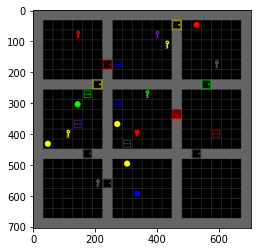

In [48]:
row_id = 8
print(f"mission: {train_demos[row_id][0]}")
img = blosc.unpack_array(train_demos[row_id][2])
plt.imshow(img[0])

In [2]:
COLOR_TO_IDX = {
    'red'   : 0,
    'green' : 1,
    'blue'  : 2,
    'purple': 3,
    'yellow': 4,
    'grey'  : 5
}

OBJECT_TO_IDX = {
    'unseen'        : 0,
    'empty'         : 1,
    'wall'          : 2,
    'floor'         : 3,
    'door'          : 4,
    'key'           : 5,
    'ball'          : 6,
    'box'           : 7,
    'goal'          : 8,
    'lava'          : 9,
    'agent'         : 10,
}

STATE_TO_IDX = {
    'open'  : 0,
    'closed': 1,
    'locked': 2,
}

IDX_TO_COLOR = {idx:color for color, idx in COLOR_TO_IDX.items()}
IDX_TO_OBJECT = {idx:obj for obj, idx in OBJECT_TO_IDX.items()}
IDX_TO_STATE = {idx:state for state, idx in STATE_TO_IDX.items()}

COLOR_IDS = list(COLOR_TO_IDX.values())
OBJECT_IDS = list(OBJECT_TO_IDX.values())

In [3]:
def is_object_existing(img, object_tuple):
    height, width, channel = img.shape
    for h in range(height):
        for w in range(width):
            if object_tuple[0] == 4:
                # this is a door, and we assume it's closed or locked
                object_id, color_id = object_tuple[0], object_tuple[1]
                if (all(img[h][w] == (object_id, color_id, 0)) or 
                    all(img[h][w] == (object_id, color_id, 1)) or
                    all(img[h][w] == (object_id, color_id, 2))):
                    return True
            else:
                if all(img[h][w] == object_tuple):
                    return True
    return False

In [4]:
def get_color_object_candidate(mission_tokenized):
    candidate_id_list = []
    for token_id in range(len(mission_tokenized) - 1):
        token_0 = mission_tokenized[token_id]
        token_1 = mission_tokenized[token_id + 1]
        if token_0 in COLOR_TO_IDX.keys() and token_1 in OBJECT_TO_IDX.keys():
            candidate_id_list.append((token_id, token_id+1))
    return candidate_id_list


def get_impossible_mission(img, mission, tolerance=20):
    # Get color-object candidates
    mission_tokenized = mission.split()
    candidate_id_list = get_color_object_candidate(mission_tokenized)
    if len(candidate_id_list) == 0:
        return None
    
    # Randomly select a color-object phrase to replace
    candidate_id = np.random.choice(list(range(len(candidate_id_list))), size=1)[0]
    color_token_id, object_token_id = candidate_id_list[candidate_id]
    color = mission_tokenized[color_token_id]
    obj = mission_tokenized[object_token_id]
    
    tolerance = tolerance
    count = 0
    while True:
        if count == tolerance:
            # Reach to number of tolerance times, which means cannot find an impossible mission
            return None

        if obj != "door":
            object_id = np.random.choice([5,6,7], size=1)[0]  # [key, ball, box]
            color_id = np.random.choice(COLOR_IDS, size=1)[0]
        else:
            # Only replace the color of a "door" target
            object_id = 4  # id for door
            color_id = np.random.choice(COLOR_IDS, size=1)[0]
        object_tuple = [object_id, color_id, 0]

        if is_object_existing(img, object_tuple):
            count += 1
        else:
            # Found an impossible mission
            object_text = IDX_TO_OBJECT[object_id]
            color_text = IDX_TO_COLOR[color_id]
            mission_tokenized[color_token_id] = color_text
            mission_tokenized[object_token_id] = object_text
            return " ".join(mission_tokenized)

put a red box next to a purple ball, then open the door behind you and pick up the purple box
put a red box next to a purple ball, then open the door behind you and pick up the blue box


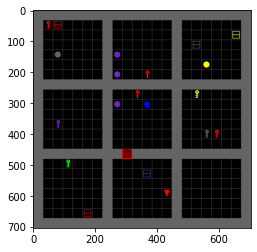

In [123]:
row_id = 9
img = blosc.unpack_array(train_demos[row_id][3])[0]
img_rgb = blosc.unpack_array(train_demos[row_id][2])[0]
mission = train_demos[row_id][0]
mission_tokenized = mission.split()
plt.imshow(img_rgb)
print(mission)

mission = get_impossible_mission(img, mission, tolerance=20)
print(mission)

In [5]:
with open("../../data/task_0/BossLevel/negative_BabyAI-BossLevel-v0-split-0.pkl", "rb") as f:
    data = pkl.load(f)

In [5]:
with open("../../data/task_0/BossLevel/positive_BabyAI-BossLevel-v0-split-0.pkl", "rb") as f:
    data = pkl.load(f)

In [6]:
data[0]

('open a yellow door',
 b"\x02\x01\x01\x01\xee\x06\x00\x00\xee\x06\x00\x00\x93\x02\x00\x00\x14\x00\x00\x00{\x02\x00\x00?\x80\x04\x95\xe3\x06\x00\x00\x00\x00\x00\x00\x8c\x15numpy.core.multiarr\x1fay\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07nd\x1farray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01(K\x0bK\x07K\x07K\x03\x1ft\x94h\x03\x8c\x05dtype\x94\x93\x94\x8c\x02u1\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94\x14NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89BQ\x80\x90\xe0\x14\x00\x02\x00\x02\x05\x80\x02\xe0\x03%\x07\x00\x04\x01\x01\x01\x00\x00\x01\xe0\x03\x13\x04\x00\x00\x02\x05\x00\xe0G\x14\xe0\x03\x00\x00\x00\xc0\x89\xe0\x00\x08\x01\x00\x00\xe0\x01t\x80z\x0e\x00\x01\x00\x00\x00\x00\x00\x02\x05\x00\x05\x04\x00\x01\x00\xe0\x00\x02\x03\x00\x00\x00\x00\xc0\x9e\x80\x14\x02\x00\x06\x04\xe0\t\x14\x08\x00\x01\x00\x00\x00\x00\x00\x04\x04\x80\xdd\x08\x00\x01\x00\x00\x07\x00\x00\x01\x00\xe0\x12\x00\x00\x00\xe0\x02\x8f\x02\x00\x02\x05\x80)\x00\x00\xe0\x05k\x80\x00\

open a door and put a blue box next to the red ball
open a door and put a blue key next to the red ball


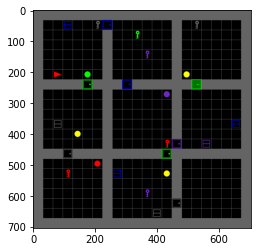

In [8]:
# 219, 315, 318, 424, 528, 537, 580, 584, 605, 607, 850, 942, 
# 1183, 1272, 1311, 1359, 1397, 1420, 1526, 1543, 1559, 1573, 1574
# 1649, 1736, 1771, 1930, 1984, 2298, 2339, 2371, 2391
row_id = 219
img = blosc.unpack_array(data[row_id][3])[0]
img_rgb = blosc.unpack_array(data[row_id][2])[0]
mission = data[row_id][0]
mission_tokenized = mission.split()
plt.imshow(img_rgb)
print(mission)

mission = get_impossible_mission(img, mission, tolerance=20)
print(mission)

  9%|███▌                                    | 220/2500 [00:15<04:09,  9.15it/s]

row id: 219
open a door
None


 13%|█████                                   | 318/2500 [00:24<02:17, 15.82it/s]

row id: 315
open a door
None
row id: 318
open a door
None


 17%|██████▊                                 | 425/2500 [00:34<03:18, 10.46it/s]

row id: 424
open a door
None


 21%|████████▍                               | 527/2500 [00:49<05:21,  6.13it/s]

row id: 528
open a door
None


 22%|████████▌                               | 539/2500 [00:50<03:41,  8.86it/s]

row id: 537
open a door
None


 23%|█████████▎                              | 583/2500 [00:56<04:57,  6.45it/s]

row id: 580
open a door
None
row id: 584
open a door
None


 24%|█████████▋                              | 607/2500 [00:59<03:56,  8.00it/s]

row id: 605
open a door
None


 24%|█████████▊                              | 611/2500 [01:00<02:52, 10.96it/s]

row id: 607
open a door
None


 34%|█████████████▋                          | 853/2500 [01:37<01:33, 17.64it/s]

row id: 850
open a door
None


 38%|███████████████                         | 942/2500 [01:42<01:29, 17.43it/s]

row id: 942
open a door
None


 47%|██████████████████▍                    | 1183/2500 [01:56<01:02, 21.13it/s]

row id: 1183
open a door
None


 51%|███████████████████▉                   | 1276/2500 [02:01<01:19, 15.40it/s]

row id: 1272
open a door
None


 52%|████████████████████▍                  | 1312/2500 [02:03<01:37, 12.16it/s]

row id: 1311
open a door
None


 54%|█████████████████████▏                 | 1361/2500 [02:07<00:51, 21.94it/s]

row id: 1359
open a door
None


 56%|█████████████████████▊                 | 1397/2500 [02:08<00:55, 19.96it/s]

row id: 1397
open a door
None


 57%|██████████████████████▏                | 1423/2500 [02:11<01:14, 14.48it/s]

row id: 1420
open a door
None


 61%|███████████████████████▊               | 1528/2500 [02:18<00:51, 18.83it/s]

row id: 1526
open a door
None


 62%|████████████████████████               | 1546/2500 [02:19<00:48, 19.85it/s]

row id: 1543
open a door
None


 62%|████████████████████████▎              | 1562/2500 [02:20<00:53, 17.42it/s]

row id: 1559
open a door
None


 63%|████████████████████████▌              | 1577/2500 [02:21<00:46, 20.06it/s]

row id: 1573
open a door
None
row id: 1574
open a door
None


 66%|█████████████████████████▊             | 1653/2500 [02:26<00:59, 14.35it/s]

row id: 1649
open a door
None


 69%|███████████████████████████            | 1735/2500 [02:31<00:58, 13.11it/s]

row id: 1736
open a door
None


 71%|███████████████████████████▋           | 1774/2500 [02:33<00:38, 18.76it/s]

row id: 1771
open a door
None


 77%|██████████████████████████████         | 1930/2500 [02:43<00:35, 15.84it/s]

row id: 1930
open a door
None


 80%|███████████████████████████████        | 1988/2500 [02:46<00:24, 21.11it/s]

row id: 1984
open a door
None


 92%|███████████████████████████████████▉   | 2300/2500 [03:06<00:13, 15.18it/s]

row id: 2298
open a door
None


 94%|████████████████████████████████████▌  | 2341/2500 [03:09<00:09, 16.74it/s]

row id: 2339
open a door
None


 95%|█████████████████████████████████████  | 2373/2500 [03:11<00:11, 10.73it/s]

row id: 2371
open a door
None


 96%|█████████████████████████████████████▍ | 2399/2500 [03:12<00:03, 27.71it/s]

row id: 2391
open a door
None


100%|███████████████████████████████████████| 2500/2500 [03:18<00:00, 12.61it/s]


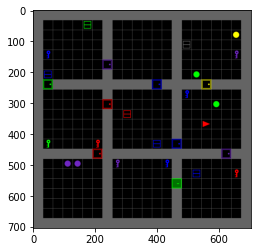

In [13]:
for row_id in tqdm(range(len(data))):
    img = blosc.unpack_array(data[row_id][3])[0]
    img_rgb = blosc.unpack_array(data[row_id][2])[0]
    mission = data[row_id][0]
    
    if mission == "open a door":
        print(f"row id: {row_id}")
        mission_tokenized = mission.split()
        plt.imshow(img_rgb)
        print(mission)

        mission = get_impossible_mission(img, mission, tolerance=20)
        print(mission)
        # 219, 315, 318, 424, 528, 537, 580, 584, 605, 607, 850, 942, 
        # 1183, 1272, 1311, 1359, 1397, 1420, 1526, 1543, 1559, 1573, 1574
        # 1649, 1736, 1771, 1930, 1984, 2298, 2339, 2371, 2391

In [162]:
object_tuple = (4,3,0)
is_object_existing(img, object_tuple)

True

In [159]:
img[16]

array([[2, 5, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [7, 4, 0],
       [1, 0, 0],
       [4, 3, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [2, 5, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [2, 5, 0]], dtype=uint8)

In [149]:
IDX_TO_COLOR

{0: 'red', 1: 'green', 2: 'blue', 3: 'purple', 4: 'yellow', 5: 'grey'}

In [150]:
IDX_TO_OBJECT

{0: 'unseen',
 1: 'empty',
 2: 'wall',
 3: 'floor',
 4: 'door',
 5: 'key',
 6: 'ball',
 7: 'box',
 8: 'goal',
 9: 'lava',
 10: 'agent'}